<a href="https://colab.research.google.com/github/patakib/image-classifier/blob/master/img_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [31]:
X_train_full.shape

(60000, 28, 28)

In [32]:
X_train_full.dtype

dtype('uint8')

In [33]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [34]:
class_names = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [35]:
class_names[y_train[0]]

'Coat'

In [36]:
class_names[y_train[17]]

'Dress'

In [37]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [40]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7311 - accuracy: 0.7587 - val_loss: 0.5392 - val_accuracy: 0.8170
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4912 - accuracy: 0.8294 - val_loss: 0.4447 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4446 - accuracy: 0.8454 - val_loss: 0.4238 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4168 - accuracy: 0.8551 - val_loss: 0.3940 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3971 - accuracy: 0.8615 - val_loss: 0.3951 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3806 - accuracy: 0.8667 - val_loss: 0.3785 - val_accuracy: 0.8672
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3685 - accuracy: 0.8699 - val_loss: 0.3909 - val_accuracy:

<function matplotlib.pyplot.show>

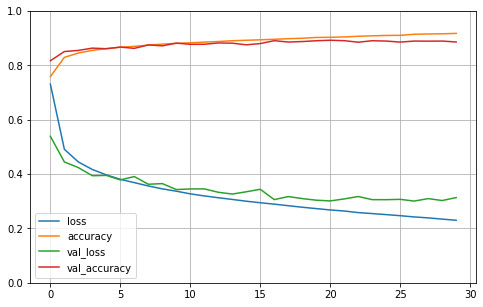

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 70.5564 - accuracy: 0.8437


[70.55636596679688, 0.8436999917030334]

In [44]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, 1, 0])

In [46]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)